In [2]:
import pandas as pd
import numpy as np
import random
import sklearn
import keras
#Preprocessing
from sklearn.model_selection import *
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
#Algorithm
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

from keras.layers import Activation, Dense, Dropout, Flatten,MaxPooling1D
from keras.models import Sequential
from keras import optimizers

#Metrics
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

#Plots
import matplotlib.pyplot as plt
import seaborn as sns

#Stats
from scipy.stats import pearsonr
from numpy import cov
import warnings
warnings.filterwarnings('ignore')
from scipy import stats as st
import datetime
import math
from scipy.stats import zscore

Using TensorFlow backend.


In [3]:
data = pd.read_csv("emission.csv")

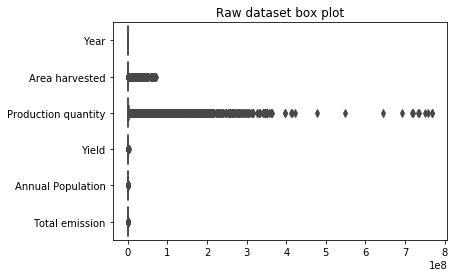

In [14]:
ax=sns.boxplot(data=data, orient="h", palette="Set1")
#ax.set(xlabel='Raw dataset', ylabel='Variable')
plt.title("Raw dataset box plot")
plt.show()

In [14]:
data['Total emission']=np.log1p(data['Total emission'])

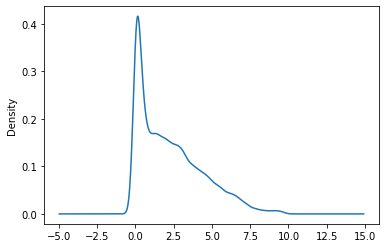

In [16]:
data['Total emission'].plot.kde()

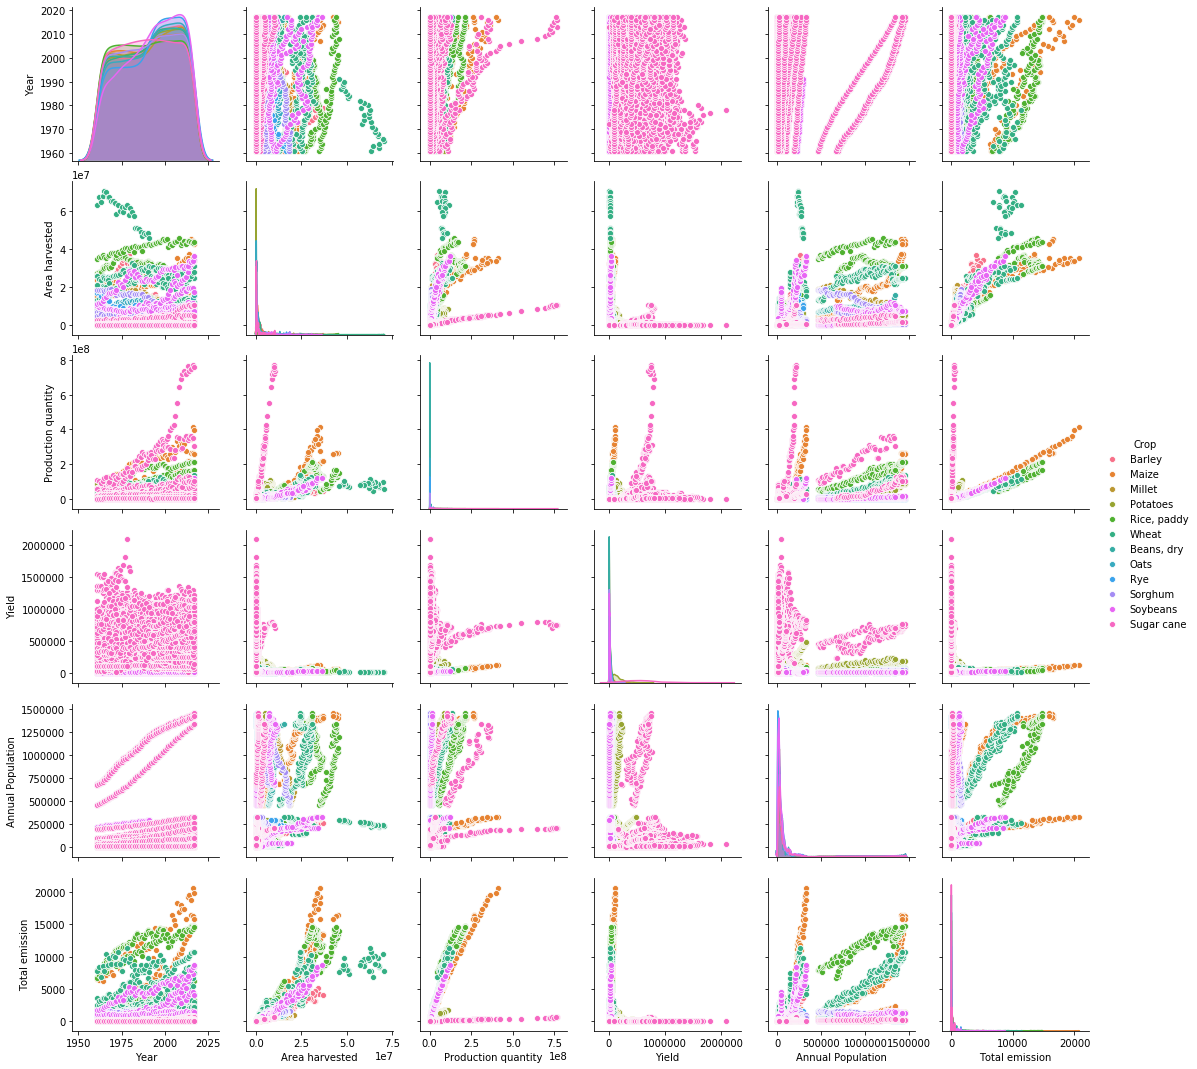

In [9]:
pp=sns.pairplot(data, hue="Crop",palette="husl", size=2.5)
pp.savefig("Rawdata_Pairplot.png")

In [13]:
i = data[(data['Area harvested'] == 0) |(data['Production quantity'] == 0)].index
data=data.drop(i)

# Raw dataset cross correlation

Cross-correlation matrix of raw dataset features and labels


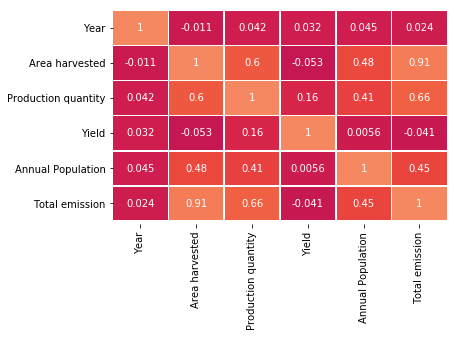

In [52]:
print("Correlation matrix of RAW features and labels")

x=sns.heatmap(corrMatrix,annot=True,annot_kws={"size":10},linewidths=.5,vmin=-2,vmax=2,cbar=False,cmap="YlGnBu")
x.set_xticklabels(
    x.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');
x.set_yticklabels(
    x.get_xticklabels(),
    horizontalalignment='right');
#plt.show()
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.6 # Add 0.5 to the bottom
t -= 0.6 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [4]:
round(data.corr(method='pearson'),3)

,Year,Area harvested,Production quantity,Yield,Annual Population,Total emission
Year,1.000,-0.011,0.042,0.032,0.045,0.024
Area harvested,-0.011,1.000,0.595,-0.053,0.481,0.908
Production quantity,0.042,0.595,1.000,0.156,0.406,0.661
Yield,0.032,-0.053,0.156,1.000,0.006,-0.041
Annual Population,0.045,0.481,0.406,0.006,1.000,0.450
Total emission,0.024,0.908,0.661,-0.041,0.450,1.000


In [9]:
#after
round(data.corr(method='pearson'),3)

,Year,Production quantity,Yield,Annual Population,Total emission
Year,1.000,0.020,0.122,0.108,0.001
Production quantity,0.020,1.000,0.357,0.547,0.910
Yield,0.122,0.357,1.000,0.001,-0.015
Annual Population,0.108,0.547,0.001,1.000,0.573
Total emission,0.001,0.910,-0.015,0.573,1.000


In [5]:
round(data.corr(method='kendall'),3)

,Year,Area harvested,Production quantity,Yield,Annual Population,Total emission
Year,1.000,-0.018,0.019,0.108,0.077,0.005
Area harvested,-0.018,1.000,0.726,-0.031,0.374,0.865
Production quantity,0.019,0.726,1.000,0.243,0.357,0.771
Yield,0.108,-0.031,0.243,1.000,0.024,0.030
Annual Population,0.077,0.374,0.357,0.024,1.000,0.364
Total emission,0.005,0.865,0.771,0.030,0.364,1.000


In [10]:
#after
round(data.corr(method='kendall'),3)

,Year,Production quantity,Yield,Annual Population,Total emission
Year,1.000,0.019,0.108,0.077,0.005
Production quantity,0.019,1.000,0.243,0.357,0.771
Yield,0.108,0.243,1.000,0.024,0.030
Annual Population,0.077,0.357,0.024,1.000,0.364
Total emission,0.005,0.771,0.030,0.364,1.000


In [6]:
round(data.corr(method='spearman'),3)

,Year,Area harvested,Production quantity,Yield,Annual Population,Total emission
Year,1.000,-0.027,0.027,0.160,0.113,0.007
Area harvested,-0.027,1.000,0.892,-0.047,0.529,0.974
Production quantity,0.027,0.892,1.000,0.363,0.505,0.894
Yield,0.160,-0.047,0.363,1.000,0.034,0.045
Annual Population,0.113,0.529,0.505,0.034,1.000,0.517
Total emission,0.007,0.974,0.894,0.045,0.517,1.000


In [11]:
#after
round(data.corr(method='spearman'),3)

,Year,Production quantity,Yield,Annual Population,Total emission
Year,1.000,0.027,0.160,0.113,0.007
Production quantity,0.027,1.000,0.363,0.505,0.894
Yield,0.160,0.363,1.000,0.034,0.045
Annual Population,0.113,0.505,0.034,1.000,0.517
Total emission,0.007,0.894,0.045,0.517,1.000


# Cross correlation Feature set-1

In [7]:
data.drop(['Area harvested'],inplace=True,axis=1)

In [54]:
data.head()

,Country,Crop,Year,Production quantity,Yield,Annual Population,Total emission
0,Afghanistan,Barley,1961,378000.0,10800.0,9169.410,35.3617
1,Afghanistan,Barley,1962,378000.0,10800.0,9351.441,35.3617
2,Afghanistan,Barley,1963,378000.0,10800.0,9543.205,35.3617
3,Afghanistan,Barley,1964,380000.0,10857.0,9744.781,35.4883
4,Afghanistan,Barley,1965,380000.0,10857.0,9956.320,35.4883


Cross-correlation matrix of raw dataset features and labels


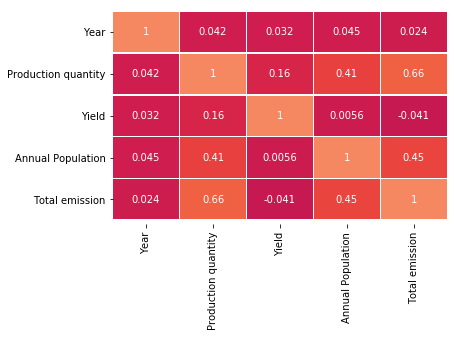

In [55]:
print("Cross-correlation matrix of raw dataset features and labels")
corrMatrix=data.corr()
x=sns.heatmap(corrMatrix, annot=True,linewidths=.5,vmin=-2,vmax=2,cbar=False)
#plt.show()
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.6 # Add 0.5 to the bottom
t -= 0.6 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

# Normalized correlation -Log10

In [15]:
data["Area harvested"] = np.log10(data["Area harvested"])
data["Production quantity"] = np.log10(data["Production quantity"])
data["Yield"] = np.log10(data["Yield"])
data["Annual Population"] = np.log10(data["Annual Population"])
data["Total emission"] = np.log10(data["Total emission"])

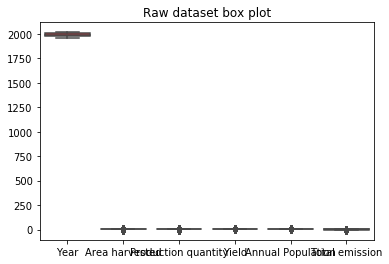

In [17]:
ax=sns.boxplot(data=data, orient="v", palette="Set1")
#ax.set(xlabel='Raw dataset', ylabel='Variable')
plt.title("Raw dataset box plot")
plt.show()

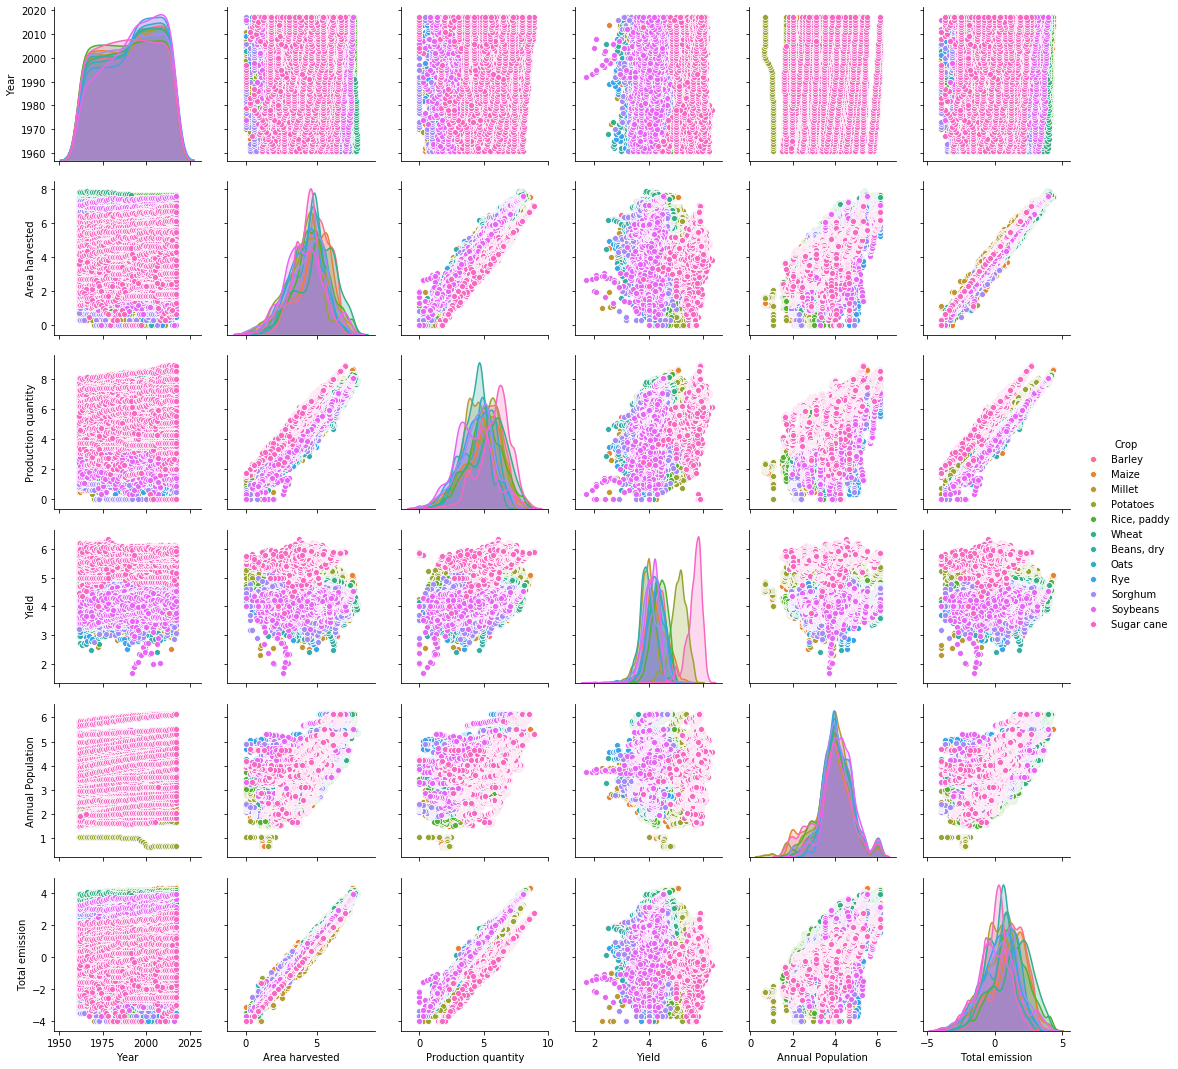

In [11]:
pp=sns.pairplot(data, hue="Crop",palette="husl", size=2.5)
pp.savefig("Normalizeddata_Pairplot.png")

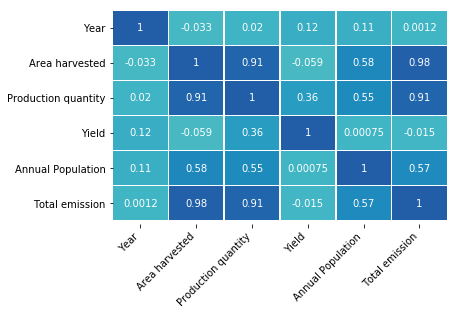

In [15]:
corrMatrix=data.corr()
x=sns.heatmap(corrMatrix,annot=True,annot_kws={"size":10},linewidths=.5,vmin=-2,vmax=2,cbar=False,cmap="YlGnBu")
x.set_xticklabels(
    x.get_xticklabels(),
    rotation=45,
    horizontalalignment='right');
x.set_yticklabels(
    x.get_xticklabels(),
    horizontalalignment='right');
#plt.show()
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.6 # Add 0.5 to the bottom
t -= 0.6 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [58]:
data.head()

,Country,Crop,Year,Production quantity,Yield,Annual Population,Total emission
0,Afghanistan,Barley,1961,5.577492,4.033424,3.962341,1.548533
1,Afghanistan,Barley,1962,5.577492,4.033424,3.970879,1.548533
2,Afghanistan,Barley,1963,5.577492,4.033424,3.979694,1.548533
3,Afghanistan,Barley,1964,5.579784,4.035710,3.988772,1.550085
4,Afghanistan,Barley,1965,5.579784,4.035710,3.998099,1.550085


# Normalized + Standardize (Drop ah)

In [59]:
df=data.copy()
cols = list(df.columns)
cols.remove('Country')
cols.remove('Crop')
cols.remove('Year')
df[cols]
df[cols]=df[cols].apply(zscore)

Cross-correlation matrix of raw dataset features and labels


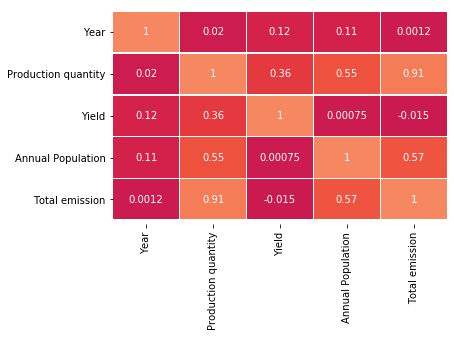

In [61]:
print("Cross-correlation matrix of raw dataset features and labels")
corrMatrix=df.corr()
x=sns.heatmap(corrMatrix, annot=True,linewidths=.5,vmin=-2,vmax=2,cbar=False)
#plt.show()
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.6 # Add 0.5 to the bottom
t -= 0.6 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

# Feature set 2

In [71]:
data = pd.read_csv("emission.csv")

In [72]:
i = data[(data['Area harvested'] == 0) |(data['Production quantity'] == 0)].index
data=data.drop(i)

In [73]:
data["Production quantity"] = (data["Production quantity"]/data["Area harvested"])
data["Yield"] = (data["Yield"]/data["Area harvested"])
data.drop(['Area harvested'],inplace=True,axis=1)

Cross-correlation matrix of raw dataset features and labels


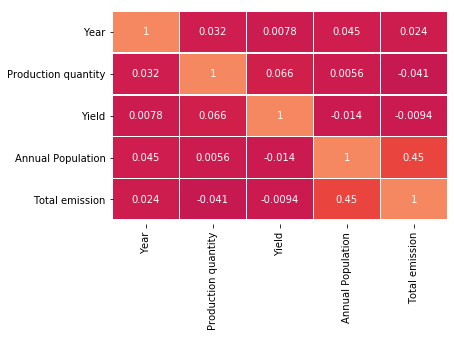

In [74]:
print("Cross-correlation matrix of raw dataset features and labels")
corrMatrix=data.corr()
x=sns.heatmap(corrMatrix, annot=True,linewidths=.5,vmin=-2,vmax=2,cbar=False)
#plt.show()
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.6 # Add 0.5 to the bottom
t -= 0.6 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [75]:
data["Production quantity"] = np.log10(data["Production quantity"])
data["Yield"] = np.log10(data["Yield"])
data["Annual Population"] = np.log10(data["Annual Population"])
data["Total emission"] = np.log10(data["Total emission"])

Cross-correlation matrix of raw dataset features and labels


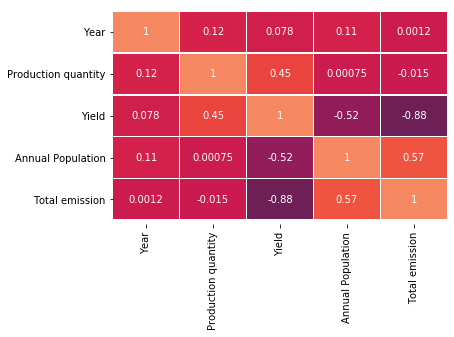

In [76]:
print("Cross-correlation matrix of raw dataset features and labels")
corrMatrix=data.corr()
x=sns.heatmap(corrMatrix, annot=True,linewidths=.5,vmin=-2,vmax=2,cbar=False)
#plt.show()
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.6 # Add 0.5 to the bottom
t -= 0.6 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!

In [80]:
df=data.copy()
cols = list(df.columns)
cols.remove('Country')
cols.remove('Crop')
cols.remove('Year')
df[cols]
df[cols]=df[cols].apply(zscore)

Cross-correlation matrix of raw dataset features and labels


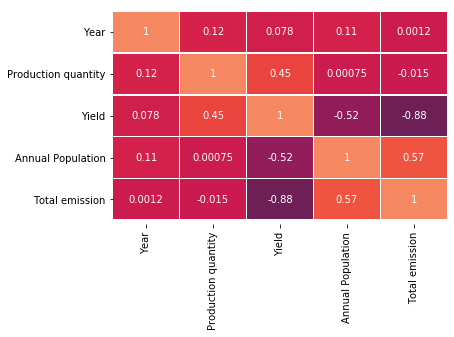

In [81]:
print("Cross-correlation matrix of raw dataset features and labels")
corrMatrix=df.corr()
x=sns.heatmap(corrMatrix, annot=True,linewidths=.5,vmin=-2,vmax=2,cbar=False)
#plt.show()
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.6 # Add 0.5 to the bottom
t -= 0.6 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show() # ta-da!